# Electricity Generation
#### By: [Samuel Duah Boadi](https://github.com/Adzoy08)

## Introduction

This cleaned [datasets](https://github.com/OmdenaAI/chennai-india-power-outage/blob/main/src/data/cleaned%20data/electricity_generation_consolidated_supply_only.csv) was loaded into this notebook to analyse the electricity generation consolidated supply.

The dataset has 504 observations with four attributes.

Meaning of Abbreviation
* MU - Million Unit (unit of energy)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the three datasets
df = pd.read_csv('data/electricity_generation_consolidated_supply_only.csv')

## Assessing Data

In [3]:
print(df.shape)
df.head()

(507, 4)


,Type,Name,Net Generation(M.U),Year
0,Gas,Basin Bridge,79.16,2010
1,Gas,Kovil Kalappal,487.20,2010
2,Gas,Vazhuthur I & II,1008.89,2010
3,Gas,Kutralam,602.78,2010
4,Gas,Wind Mill,11.09,2010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 507 non-null    object 
 1   Name                 507 non-null    object 
 2   Net Generation(M.U)  489 non-null    float64
 3   Year                 507 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


In [5]:
df.describe()

,Net Generation(M.U),Year
count,489.000000,507.000000
mean,552.352741,2015.605523
std,1581.153491,3.722356
min,-2.601000,2010.000000
25%,18.925000,2012.000000
50%,80.070000,2016.000000
75%,272.012000,2019.000000
max,18548.700000,2022.000000


In [6]:
df['Type'].value_counts()

Hydro                404
Gas                   55
Thermal               46
Wind Mill + Solar      2
Name: Type, dtype: int64

In [7]:
df['Name'].value_counts()

Periyar                              11
Kovil Kalappal                       11
Kadamparai                           11
Pykara                               11
Aliyar                               11
                                     ..
NCTPS Stage-II (Infirm)               1
Total Hydro                           1
Periyar Vaigai Micro Hydel I & II     1
Bhavani Kattalai PH – 2               1
Stage - II                            1
Name: Name, Length: 140, dtype: int64

In [8]:
df[df['Net Generation(M.U)'].isna()]

,Type,Name,Net Generation(M.U),Year
104,Gas,Wind Mill + Solar,NaN,2012
124,Hydro,Bhavani Kattalai PH - 2,NaN,2012
176,Hydro,Bhavani Kattalai PH – 2,NaN,2013
204,Thermal,NCTPS Stage-II (Infirm),NaN,2013
205,Thermal,NCTPS Stage-III (Infirm),NaN,2013
210,Gas,Valuthur Phase II,NaN,2016
230,Hydro,Bhavani Kattalai PH-2,NaN,2016
231,Hydro,Bhavani Kattalai PH-3,NaN,2016
232,Hydro,Bhavani Barrage 2 PH,NaN,2016
233,Hydro,Bhavani Barrage 2 PH,NaN,2016


In [9]:
# remove null values
df.dropna(inplace=True)

## Exploratory Data Analysis

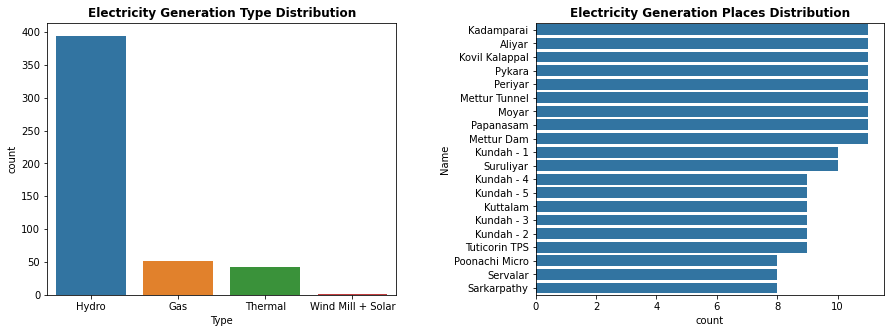

In [10]:
plt.figure(figsize = [15, 5])

    #  LEFT plot: Bar plot of 'Type'
plt.subplot(1, 2, 1)
type_order = df['Type'].value_counts().index
sb.countplot(data=df, x='Type', order = type_order)
plt.title('Electricity Generation Type Distribution', weight='bold');    
    
    # RIGHT plot: Bar plot of 'Name'
plt.subplot(1, 2, 2)
name_order = df['Name'].value_counts().head(20).index
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='Name', color=base_color, order=name_order)
plt.title('Electricity Generation Places Distribution', weight='bold');

plt.subplots_adjust(wspace=0.4)

> There are a lot of Hydros in India, four times the combined other 3 types of electricity generators.<br>
Wind Mill & Solar appeared only once in the dataset.<br>
Eleven Electricity Generation places appeared ten or more times in the dataset. 

In [11]:
def plot_mean_sum(x, top=10):
    '''
    A function to plot a bivariate visualization.
    Group the dataset by 'Type'/'Name' and calculate the mean and sum of
    'Net Generation(M.U)'.
    
    Parameters     x (str)     ->  a qualitative variable
                                   'Type' or 'Name'
                   top (int)   ->  view the top k values after the calculation
                                   default value for 'Name' = 10
                                                     'Type' = 4
                                                     
    return         two bar plots in one figure
                   mean of Net Generation on the LEFT plot and
                   sum of Net Generation on the RIGHT plot
    
    '''
    # top k for 'Type' column to 4
    if x == 'Type':
        top = 4
        
    # group by 'Type'/'Name' and calculate mean and sum of 'Net Generation(M.U)'
    a = df.groupby([x])['Net Generation(M.U)'].mean().reset_index(name='mean')
    b = df.groupby([x])['Net Generation(M.U)'].sum().reset_index(name='sum')
        
    base_color = sb.color_palette()[0]
    plt.figure(figsize = [16, 4])

    #  LEFT plot: Bar plot of mean
    plt.subplot(1, 2, 1)
    
    # show the highest from top to bottom or left to right
    x_order = list(a.sort_values(by='mean', ascending=False).head(top)[x])
    
    if x == 'Name':
        sb.barplot(data=a, x='mean', y=x, color=base_color, order=x_order)
        plt.xlabel('Avg. Net Generation(M.U)')
    else:
        sb.barplot(data=a, x=x, y='mean', color=base_color, order=x_order)
        plt.ylabel('Avg. Net Generation(M.U)')
    
     # RIGHT plot: Bar plot of sum
    plt.subplot(1, 2, 2)
    
    # show the highest from top to bottom or left to right
    x_order = list(b.sort_values(by='sum', ascending=False).head(top)[x])
    
    if x == 'Name':
        sb.barplot(data=b, x='sum', y=x, color=base_color, order=x_order)
        plt.xlabel('Total Net Generation(M.U)')
        plt.subplots_adjust(wspace=0.4)
    else:
        sb.barplot(data=b, x=x, y='sum', color=base_color, order=x_order)
        plt.ylabel('Total Net Generation(M.U)') 
    
    if x == 'Name':
        x = 'Place'
    plt.suptitle('The Average & Total Net Generation(M.U) By {}'.format(x), fontsize=16)

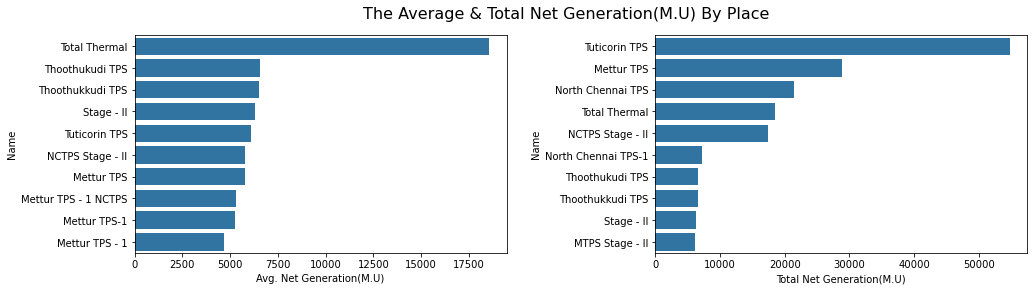

In [12]:
plot_mean_sum('Name')

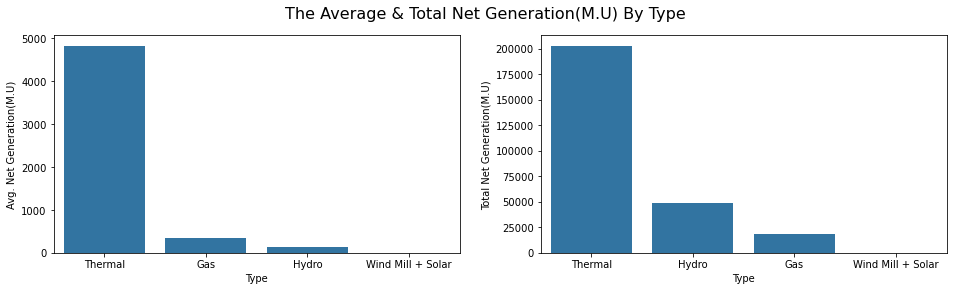

In [13]:
plot_mean_sum('Type')

In [14]:
def line_plot(typ):
    '''
    A function to plot a bivariate visualization
    Extract the particular type of electricity genration then group by year by
    suming the Net Generation(M.U).
    
    Parameter   typ(str) -> The type of electricity generation
    return      a line plot
    '''
    
    b=df[df['Type'] == typ]
    b = b.groupby(['Year'])['Net Generation(M.U)'].sum().reset_index(name='sum')
    plt.errorbar(data=b, x='Year', y='sum')
    plt.title('{} Net Generation (M.U)'.format(typ), weight='bold')
    plt.ylabel('Net Generation(M.U)')
    plt.xlabel('time period')

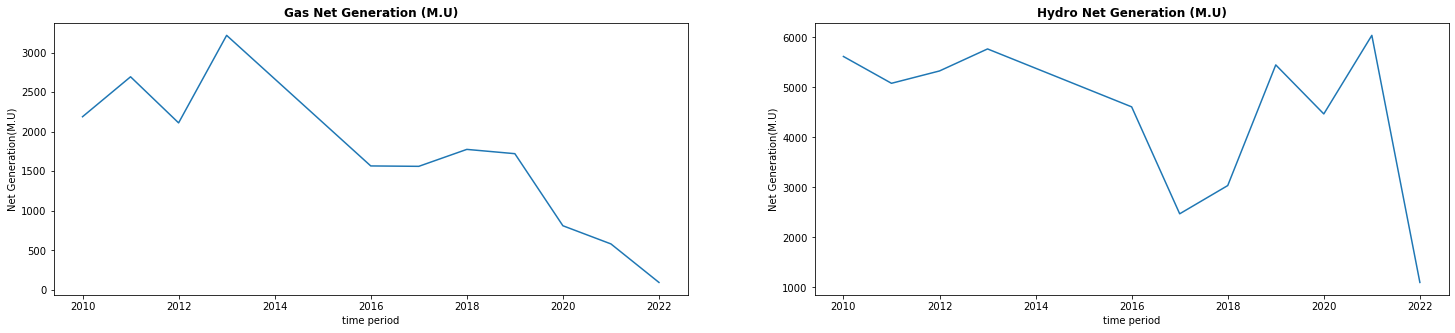

In [15]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
line_plot('Gas')

plt.subplot(1, 2, 2)
line_plot('Hydro')

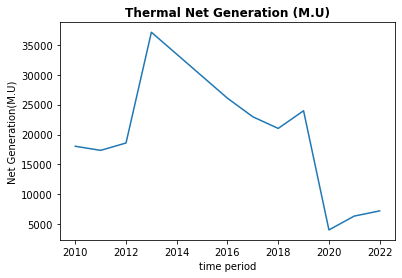

In [16]:
line_plot('Thermal')

In [17]:
df[df['Type'] == 'Wind Mill + Solar']

,Type,Name,Net Generation(M.U),Year
372,Wind Mill + Solar,TNEB,6.915,2018


> From the visualization and excluding the year 2022, Gas and Thermal Net Generations has seen a decline since 2014.<br>
Hydro Net Generation (excluding the year 2022) has seen an increase since 2017 but a decrease electricity supply in 2020 and then an increase in 2021.<br>
Wind Mill & Solar from TNEB only supplied electricity in the year 2018.